### pandas介绍：
  * numpy序列化的矩阵，类似列表
  * pandas类似字典

In [1]:
import pandas as pd
import numpy as np

In [4]:
s =pd.Series([1,2,6,np.nan,44,1])
s

0     1.0
1     2.0
2     6.0
3     NaN
4    44.0
5     1.0
dtype: float64

In [6]:
dates = pd.date_range('20180303',periods=6)
dates

DatetimeIndex(['2018-03-03', '2018-03-04', '2018-03-05', '2018-03-06',
               '2018-03-07', '2018-03-08'],
              dtype='datetime64[ns]', freq='D')

In [7]:
df=pd.DataFrame(np.random.randn(6,4),index=dates,columns=['a','b','c','d'])
df

,a,b,c,d
2018-03-03,1.761004,1.648836,-0.656910,0.535489
2018-03-04,-0.363756,1.480507,0.354068,-1.358791
2018-03-05,-0.349576,0.088785,1.165699,1.152263
2018-03-06,-1.153368,0.309072,0.836402,0.478812
2018-03-07,0.952556,-1.973463,1.178855,-0.152371
2018-03-08,0.120752,1.646287,-0.434218,0.761825


In [29]:
df1=pd.DataFrame(np.arange(12).reshape((3,4)))
df1

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [4]:
df2=pd.DataFrame({'A':1.,
                  'B':pd.Timestamp('20180303'),
                  'C':pd.Series(1,index=list(range(4)),dtype='float32'),
                 'D':np.array([3]*4,dtype='int32'),
                 'E':pd.Categorical(["test","train","test","train"]),
                 'F':'foo'})
df2

,A,B,C,D,E,F
0,1.0,2018-03-03,1.0,3,test,foo
1,1.0,2018-03-03,1.0,3,train,foo
2,1.0,2018-03-03,1.0,3,test,foo
3,1.0,2018-03-03,1.0,3,train,foo


In [5]:
print(df2.dtypes,'\n')
print(df2.index,'\n')
print(df2.columns,'\n')
print(df2.values,'\n')
print(df2.describe(),'\n')
print(df2.T,'\n')
print(df2.sort_index(axis=1,ascending=False))
print(df2.sort_values(by='E'))


A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object 

Int64Index([0, 1, 2, 3], dtype='int64') 

Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object') 

[[1.0 Timestamp('2018-03-03 00:00:00') 1.0 3 'test' 'foo']
 [1.0 Timestamp('2018-03-03 00:00:00') 1.0 3 'train' 'foo']
 [1.0 Timestamp('2018-03-03 00:00:00') 1.0 3 'test' 'foo']
 [1.0 Timestamp('2018-03-03 00:00:00') 1.0 3 'train' 'foo']] 

         A    C    D
count  4.0  4.0  4.0
mean   1.0  1.0  3.0
std    0.0  0.0  0.0
min    1.0  1.0  3.0
25%    1.0  1.0  3.0
50%    1.0  1.0  3.0
75%    1.0  1.0  3.0
max    1.0  1.0  3.0 

                     0                    1                    2  \
A                    1                    1                    1   
B  2018-03-03 00:00:00  2018-03-03 00:00:00  2018-03-03 00:00:00   
C                    1                    1                    1   
D                    3                    3                   

### pandas选择数据：

In [15]:
dates=pd.date_range('20180303',periods=6)
df=pd.DataFrame(np.arange(24).reshape((6,4)),index=dates,columns=['A','B','C','D'])
df

,A,B,C,D
2018-03-03,0,1,2,3
2018-03-04,4,5,6,7
2018-03-05,8,9,10,11
2018-03-06,12,13,14,15
2018-03-07,16,17,18,19
2018-03-08,20,21,22,23


In [119]:
print(df['A'],'\n')
print(df.A,'\n')
print(df[0:3],'\n')
print(df['2018-03-04':'2018-03-7'])

2018-03-03     0
2018-03-04     4
2018-03-05     8
2018-03-06    12
2018-03-07    16
2018-03-08    20
Freq: D, Name: A, dtype: int64 

2018-03-03     0
2018-03-04     4
2018-03-05     8
2018-03-06    12
2018-03-07    16
2018-03-08    20
Freq: D, Name: A, dtype: int64 

            A  B   C   D
2018-03-03  0  1   2   3
2018-03-04  4  5   6   7
2018-03-05  8  9  10  11 

             A   B   C   D
2018-03-04   4   5   6   7
2018-03-05   8   9  10  11
2018-03-06  12  13  14  15
2018-03-07  16  17  18  19


In [115]:
#select by label:loc(标签)
print(df.loc['20180303'],'\n')
print(df.loc['20180303',['A','B']]  )

A    0
B    1
C    2
D    3
Name: 2018-03-03 00:00:00, dtype: int64 

A    0
B    1
Name: 2018-03-03 00:00:00, dtype: int64


In [70]:
#select by position:iloc(数字)
print(df.iloc[3:5,1:3])

             B   C
2018-03-06  13  14
2018-03-07  17  18


In [113]:
#mixed selection:ix
print(df.ix[:3,['A','C']])
print(df.ix['20180303':'20180305',['A','C']])
print(df.ix['20180303':'20180305',[0,2]])

            A   C
2018-03-03  0   2
2018-03-04  4   6
2018-03-05  8  10
            A   C
2018-03-03  0   2
2018-03-04  4   6
2018-03-05  8  10
            A   C
2018-03-03  0   2
2018-03-04  4   6
2018-03-05  8  10


* 竖的标签只能单行或df['2018-03-04':'2018-03-7']
* 横的标签智能['A','B']，不能['A':'C']

In [122]:
#Boolean indexing
print(df)
print(df[df.A>8])

             A   B   C   D
2018-03-03   0   1   2   3
2018-03-04   4   5   6   7
2018-03-05   8   9  10  11
2018-03-06  12  13  14  15
2018-03-07  16  17  18  19
2018-03-08  20  21  22  23
             A   B   C   D
2018-03-06  12  13  14  15
2018-03-07  16  17  18  19
2018-03-08  20  21  22  23


### pandas 设置值：

In [177]:
dates=pd.date_range('20180303',periods=6)
df=pd.DataFrame(np.arange(24).reshape((6,4)),index=dates,columns=['A','B','C','D'])
df

,A,B,C,D
2018-03-03,0,1,2,3
2018-03-04,4,5,6,7
2018-03-05,8,9,10,11
2018-03-06,12,13,14,15
2018-03-07,16,17,18,19
2018-03-08,20,21,22,23


In [178]:
df.iloc[2,2]=1111
df

,A,B,C,D
2018-03-03,0,1,2,3
2018-03-04,4,5,6,7
2018-03-05,8,9,1111,11
2018-03-06,12,13,14,15
2018-03-07,16,17,18,19
2018-03-08,20,21,22,23


In [179]:
df.loc['20180306','B']=2222
df

,A,B,C,D
2018-03-03,0,1,2,3
2018-03-04,4,5,6,7
2018-03-05,8,9,1111,11
2018-03-06,12,2222,14,15
2018-03-07,16,17,18,19
2018-03-08,20,21,22,23


In [180]:
df.A[df.A>4]=0
df

,A,B,C,D
2018-03-03,0,1,2,3
2018-03-04,4,5,6,7
2018-03-05,0,9,1111,11
2018-03-06,0,2222,14,15
2018-03-07,0,17,18,19
2018-03-08,0,21,22,23


In [188]:
df=pd.DataFrame(np.arange(24).reshape((6,4)),index=dates,columns=['A','B','C','D'])
df[df.A>4]=0
df

,A,B,C,D
2018-03-03,0,1,2,3
2018-03-04,4,5,6,7
2018-03-05,0,0,0,0
2018-03-06,0,0,0,0
2018-03-07,0,0,0,0
2018-03-08,0,0,0,0


In [191]:
df['F']=np.nan
print(df)
df['E']=pd.Series([1,2,3,4,5,6],index=dates)

            A  B  C  D   F  E
2018-03-03  0  1  2  3 NaN  1
2018-03-04  4  5  6  7 NaN  2
2018-03-05  0  0  0  0 NaN  3
2018-03-06  0  0  0  0 NaN  4
2018-03-07  0  0  0  0 NaN  5
2018-03-08  0  0  0  0 NaN  6


### pandas处理丢失数据：

In [194]:
df=pd.DataFrame(np.arange(24).reshape((6,4)),index=dates,columns=['A','B','C','D'])
df

,A,B,C,D
2018-03-03,0,1,2,3
2018-03-04,4,5,6,7
2018-03-05,8,9,10,11
2018-03-06,12,13,14,15
2018-03-07,16,17,18,19
2018-03-08,20,21,22,23


In [197]:
df.iloc[0,1]=np.nan
df.iloc[1,2]=np.nan
df

,A,B,C,D
2018-03-03,0,NaN,2.0,3
2018-03-04,4,5.0,NaN,7
2018-03-05,8,9.0,10.0,11
2018-03-06,12,13.0,14.0,15
2018-03-07,16,17.0,18.0,19
2018-03-08,20,21.0,22.0,23


In [207]:
print(df.dropna(axis=0,how='any'))#how={'any','all'}，默认any
print(df.dropna(axis=1,how='all'))
print(df.fillna(value=0))
print(df.isnull())
print(np.any(df.isnull())==True)


             A     B     C   D
2018-03-05   8   9.0  10.0  11
2018-03-06  12  13.0  14.0  15
2018-03-07  16  17.0  18.0  19
2018-03-08  20  21.0  22.0  23
             A     B     C   D
2018-03-03   0   NaN   2.0   3
2018-03-04   4   5.0   NaN   7
2018-03-05   8   9.0  10.0  11
2018-03-06  12  13.0  14.0  15
2018-03-07  16  17.0  18.0  19
2018-03-08  20  21.0  22.0  23
             A     B     C   D
2018-03-03   0   0.0   2.0   3
2018-03-04   4   5.0   0.0   7
2018-03-05   8   9.0  10.0  11
2018-03-06  12  13.0  14.0  15
2018-03-07  16  17.0  18.0  19
2018-03-08  20  21.0  22.0  23
                A      B      C      D
2018-03-03  False   True  False  False
2018-03-04  False  False   True  False
2018-03-05  False  False  False  False
2018-03-06  False  False  False  False
2018-03-07  False  False  False  False
2018-03-08  False  False  False  False
True


### pandas导入导出：

In [2]:
data=pd.read_csv('Student.csv')
print(data)
data.to_pickle('student.pickle')

    Student ID   name  age  grender
0         1100      A    21  Female
1         1101      B    22    Male
2         1102      C    12  Female
3         1103     ZL    32    Male
4         1104    ZYJ    16  Female
5         1105     JL    18  Female
6         1106    DOG    16  Female
7         1107    CAT    24  Female
8         1108      D    25    Male
9         1109      E    26    Male
10        1110      F    26    Male
11        1111      G    19  Female
12        1112      H    17    Male
13        1113      I    21    Male
14        1114  KEELY    12  Female


### pandas合并concat:

In [12]:
df1=pd.DataFrame(np.ones((3,4))*0,columns=['a','b','c','d'])
df2=pd.DataFrame(np.ones((3,4))*1,columns=['a','b','c','d'])
df3=pd.DataFrame(np.ones((3,4))*2,columns=['a','b','c','d'])
print(df1)
print(df2)
print(df3)
res=pd.concat([df1,df2,df3],axis=0)
print(res)
res=pd.concat([df1,df2,df3],axis=0,ignore_index=True)
print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
     a    b    c    d
0  1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0
     a    b    c    d
0  2.0  2.0  2.0  2.0
1  2.0  2.0  2.0  2.0
2  2.0  2.0  2.0  2.0
     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
0  1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0
0  2.0  2.0  2.0  2.0
1  2.0  2.0  2.0  2.0
2  2.0  2.0  2.0  2.0
     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0
6  2.0  2.0  2.0  2.0
7  2.0  2.0  2.0  2.0
8  2.0  2.0  2.0  2.0


In [26]:
#join,['inner','outer']
df1=pd.DataFrame(np.ones((3,4))*0,columns=['a','b','c','d'],index=[1,2,3])
df2=pd.DataFrame(np.ones((3,4))*1,columns=['b','c','d','e'],index=[2,3,4])
print(df1)
print(df2)
res=pd.concat([df1,df2],join='outer')#默认outer
print(res)
res1=pd.concat([df1,df2],join='inner')
print(res1)
res2=pd.concat([df1,df2],join='inner',ignore_index=True)
print(res2)

     a    b    c    d
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0
     b    c    d    e
2  1.0  1.0  1.0  1.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
     a    b    c    d    e
1  0.0  0.0  0.0  0.0  NaN
2  0.0  0.0  0.0  0.0  NaN
3  0.0  0.0  0.0  0.0  NaN
2  NaN  1.0  1.0  1.0  1.0
3  NaN  1.0  1.0  1.0  1.0
4  NaN  1.0  1.0  1.0  1.0
     b    c    d
1  0.0  0.0  0.0
2  0.0  0.0  0.0
3  0.0  0.0  0.0
2  1.0  1.0  1.0
3  1.0  1.0  1.0
4  1.0  1.0  1.0
     b    c    d
0  0.0  0.0  0.0
1  0.0  0.0  0.0
2  0.0  0.0  0.0
3  1.0  1.0  1.0
4  1.0  1.0  1.0
5  1.0  1.0  1.0


In [30]:
res3=pd.concat([df1,df2],axis=1,join_axes=[df1.index])
print(res3)
res4=pd.concat([df1,df2],axis=1)
print(res4)

     a    b    c    d    b    c    d    e
1  0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN
2  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0
3  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0
     a    b    c    d    b    c    d    e
1  0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN
2  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0
3  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0
4  NaN  NaN  NaN  NaN  1.0  1.0  1.0  1.0


In [35]:
df1=pd.DataFrame(np.ones((3,4))*0,columns=['a','b','c','d'])
df2=pd.DataFrame(np.ones((3,4))*1,columns=['a','b','c','d'])
df3=pd.DataFrame(np.ones((3,4))*2,columns=['b','c','d','e'],index=[2,3,4])
res=df1.append(df2,ignore_index=True)
print(res)
res1=df1.append([df2,df3],ignore_index=True)
print(res1)
s1=pd.Series([1,2,3,4],index=['a','b','c','d'])
res2=df1.append(s1,ignore_index=True)
print(res2)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0
     a    b    c    d    e
0  0.0  0.0  0.0  0.0  NaN
1  0.0  0.0  0.0  0.0  NaN
2  0.0  0.0  0.0  0.0  NaN
3  1.0  1.0  1.0  1.0  NaN
4  1.0  1.0  1.0  1.0  NaN
5  1.0  1.0  1.0  1.0  NaN
6  NaN  2.0  2.0  2.0  2.0
7  NaN  2.0  2.0  2.0  2.0
8  NaN  2.0  2.0  2.0  2.0
     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  2.0  3.0  4.0


### pandas合并merge：

In [39]:
#merging two df by key/keys.(may be used in database)
#simple example
left=pd.DataFrame({'key':['K0','K1','K2','K3'],
                                  'A':['A0','A1','A2','A3'],
                                  'B':['B0','B1','B2','B3']})
right=pd.DataFrame({'key':['K0','K1','K2','K3'],
                                  'C':['C0','C1','C2','C3'],
                                  'D':['D0','D1','D2','D3']})
print(left)
print(right)

res=pd.merge(left,right,on='key')
print(res)

    A   B key
0  A0  B0  K0
1  A1  B1  K1
2  A2  B2  K2
3  A3  B3  K3
    C   D key
0  C0  D0  K0
1  C1  D1  K1
2  C2  D2  K2
3  C3  D3  K3
    A   B key   C   D
0  A0  B0  K0  C0  D0
1  A1  B1  K1  C1  D1
2  A2  B2  K2  C2  D2
3  A3  B3  K3  C3  D3


In [57]:
#merging two df by key/keys.(may be used in database)
#consider two keys

left=pd.DataFrame({'key1':['K0','K0','K1','K2'],
                                  'key2':['K0','K1','K0','K1'],
                                  'A':['A0','A1','A2','A3'],
                                  'B':['B0','B1','B2','B3']})
right=pd.DataFrame({'key1':['K0','K1','K1','K2'],
                                  'key2':['K0','K0','K0','K0'],
                                  'C':['C0','C1','C2','C3'],
                                  'D':['D0','D1','D2','D3']})
print(left)
print(right)

res=pd.merge(left,right,on=['key1','key2'])#默认'inner',有'outter','left','right'
print(res,'\n')
res=pd.merge(left,right,on=['key1','key2'],how='outer')
print(res,'\n')
res=pd.merge(left,right,on=['key1','key2'],how='right')
print(res,'\n')
res=pd.merge(left,right,on=['key1','key2'],how='left')
print(res,'\n')

    A   B key1 key2
0  A0  B0   K0   K0
1  A1  B1   K0   K1
2  A2  B2   K1   K0
3  A3  B3   K2   K1
    C   D key1 key2
0  C0  D0   K0   K0
1  C1  D1   K1   K0
2  C2  D2   K1   K0
3  C3  D3   K2   K0
    A   B key1 key2   C   D
0  A0  B0   K0   K0  C0  D0
1  A2  B2   K1   K0  C1  D1
2  A2  B2   K1   K0  C2  D2 

     A    B key1 key2    C    D
0   A0   B0   K0   K0   C0   D0
1   A1   B1   K0   K1  NaN  NaN
2   A2   B2   K1   K0   C1   D1
3   A2   B2   K1   K0   C2   D2
4   A3   B3   K2   K1  NaN  NaN
5  NaN  NaN   K2   K0   C3   D3 

     A    B key1 key2   C   D
0   A0   B0   K0   K0  C0  D0
1   A2   B2   K1   K0  C1  D1
2   A2   B2   K1   K0  C2  D2
3  NaN  NaN   K2   K0  C3  D3 

    A   B key1 key2    C    D
0  A0  B0   K0   K0   C0   D0
1  A1  B1   K0   K1  NaN  NaN
2  A2  B2   K1   K0   C1   D1
3  A2  B2   K1   K0   C2   D2
4  A3  B3   K2   K1  NaN  NaN 



In [54]:
#indicator
df1=pd.DataFrame({'col1':[0,1],'col_left':['a','b']})
df2=pd.DataFrame({'col1':[1,1,2],'col_right':[2,2,2]})
print(df1)
print(df2)
print()

res=pd.merge(df1,df2,on='col1',how='outer',indicator=True)
print(res,'\n')
#give the indicator a custom name
res=pd.merge(df1,df2,on='col1',how='outer',indicator='indicator_column')
print(res)

   col1 col_left
0     0        a
1     1        b
   col1  col_right
0     1          2
1     1          2
2     2          2

   col1 col_left  col_right      _merge
0     0        a        NaN   left_only
1     1        b        2.0        both
2     1        b        2.0        both
3     2      NaN        2.0  right_only 

   col1 col_left  col_right indicator_column
0     0        a        NaN        left_only
1     1        b        2.0             both
2     1        b        2.0             both
3     2      NaN        2.0       right_only


In [58]:
#merged by index
left=pd.DataFrame({ 'A':['A0','A1','A2'],
                                  'B':['B0','B1','B2']},
                                  index=['K0','K1','K2'])
right=pd.DataFrame({'C':['C0','C1','C2'],
                                  'D':['D0','D1','D2']},
                                    index=['K0','K2','K3'])
print(left)
print(right)
#left index and right index
res=pd.merge(left,right,left_index=True,right_index=True,how='outer')
print(res,'\n')
res=pd.merge(left,right,left_index=True,right_index=True,how='inner')
print(res,'\n')

     A   B
K0  A0  B0
K1  A1  B1
K2  A2  B2
     C   D
K0  C0  D0
K2  C1  D1
K3  C2  D2
      A    B    C    D
K0   A0   B0   C0   D0
K1   A1   B1  NaN  NaN
K2   A2   B2   C1   D1
K3  NaN  NaN   C2   D2 

     A   B   C   D
K0  A0  B0  C0  D0
K2  A2  B2  C1  D1 



In [65]:
#handle overlapping
boys=pd.DataFrame({'k':['K0','K1','K2'],'age':[1,2,3]})
girls=pd.DataFrame({'k':['K0','K0','K3'],'age':[1,2,3]})

print(boys)
print(girls)

res=pd.merge(boys,girls,on='k',suffixes=['_boys','_girls'],how='inner')
print(res)

   age   k
0    1  K0
1    2  K1
2    3  K2
   age   k
0    1  K0
1    2  K0
2    3  K3
   age_boys   k  age_girls
0         1  K0          1
1         1  K0          2


### pandas plot画图:

0     -0.959442
1     -0.222316
2     -1.101402
3     -0.343054
4     -1.143908
5     -0.865217
6      1.123038
7      1.450682
8      0.074431
9     -3.020257
10    -0.086262
11     1.812281
12    -0.641565
13    -0.205208
14    -0.119555
15     0.634220
16     2.048564
17     1.125738
18     0.148725
19     0.811140
20     1.598915
21     1.864149
22     0.216722
23     0.232432
24    -1.507853
25    -0.536817
26    -0.542887
27    -0.114205
28     0.678069
29    -1.036662
         ...   
970   -1.095183
971    0.208577
972   -2.504025
973    0.644188
974    1.037801
975    1.746983
976   -0.598371
977    0.231132
978   -2.704156
979   -1.114159
980   -0.576228
981    0.937934
982   -0.266968
983   -0.380652
984    0.797207
985    0.298930
986    0.600689
987   -0.232611
988   -0.503214
989    0.534143
990   -1.450833
991    0.819123
992    1.450055
993   -0.931977
994   -0.552805
995   -1.006700
996    0.252290
997    1.313196
998   -1.536867
999   -0.515193
Length: 1000, dtype: flo

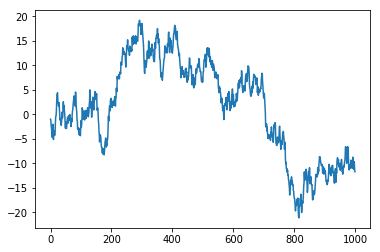

In [71]:
import matplotlib.pyplot as plt
#plot data
#Series
data=pd.Series(np.random.randn(1000),index=np.arange(1000))
print(data,'\n')
data=data.cumsum()
print(data,'\n')
data.plot()
plt.show()


          A         B         C         D
0  1.223875  0.176017 -1.794087  0.387108
1  1.295307 -0.418600 -1.664779 -0.991484
2  1.940350 -0.147606 -1.479971 -1.291404
3  1.147032 -1.084748 -1.604633 -0.343525
4  1.636540  0.355520 -2.392171  0.007094


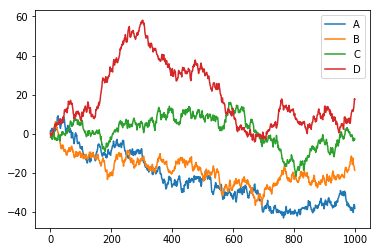

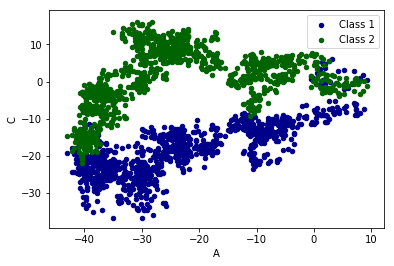

In [99]:
#DataFrame
data=pd.DataFrame(np.random.randn(1000,4),index=np.arange(1000),columns=list("ABCD"))
data=data.cumsum()
print(data.head())
data.plot()
plt.show()
#plot的methods:
#'bar(条形图)',‘hist','box','kde','area','scatter,'hexbin','pie'
ax=data.plot.scatter(x='A',y='B',color='DarkBlue',label='Class 1')
data.plot.scatter(x='A',y='C',color='DarkGreen',label='Class 2',ax=ax)
plt.show()